# Linear Regression

## Related files:
- dc_bikes_clean.csv

## Import package

In [1]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt
import scipy.stats as sps

## 1. Load the data in a pandas dataframe

## 2. Set the datetime column as the dataframe index

In [2]:
df = pd.read_csv('../data/dc_bikes_clean.csv', parse_dates = True, index_col = 0)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,1,Saturday,0,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,Saturday,1,0,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,1,Saturday,2,0,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,1,Saturday,3,0,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,1,Saturday,4,0,night


## 3. Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count

In [3]:
df_subset = df[['temp','atemp','humidity','windspeed','count']]
df_subset

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


## 4. Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?

>#### My answer: temp and atemp have the 'highest' correlation (41%) with the count column.

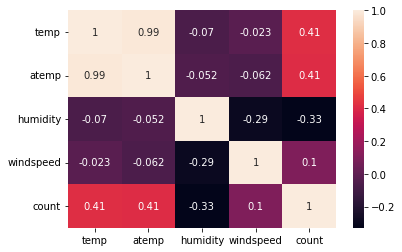

In [4]:
sns.heatmap(df_subset.corr(), annot = True);

## 5. Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.

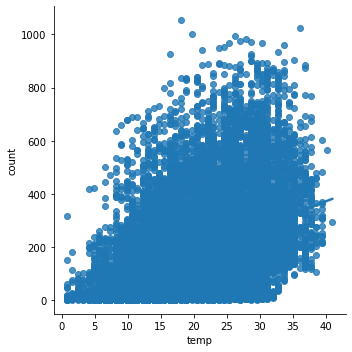

In [5]:
sns.lmplot(data = df_subset, x = 'temp', y = 'count');

In [6]:
model1 = sm.ols(formula ='count ~ temp', data = df_subset).fit()

In [7]:
model1.params

Intercept   -1.502696
temp         9.330142
dtype: float64

In [8]:
model1.rsquared_adj

0.17193951437174193

In [9]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     3609.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:20:52   Log-Likelihood:            -1.1304e+05
No. Observations:               17379   AIC:                         2.261e+05
Df Residuals:                   17377   BIC:                         2.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5027      3.394     -0.443      0.658      -8.155       5.149
temp           9.3301      0.155     60.078      0.000       9.026       9.635
==============================================================================
Omnibus:                     3036.585   Durbin-Watson:                   0.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5378.537
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       4.543   Cond. No.                         60.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?


In [10]:
model2 = sm.ols(formula ='count ~ temp + atemp', data = df_subset).fit()

In [11]:
model2.params

Intercept   -5.085982
temp         7.286584
atemp        1.901057
dtype: float64

In [12]:
model2.rsquared_adj

0.17209913556328482

## 7. Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?

In [13]:
model3 = sm.ols(formula ='count ~ temp + atemp + humidity + windspeed', data = df_subset).fit()

In [14]:
model3.params

Intercept    155.215146
temp           0.902444
atemp          7.422851
humidity      -2.738443
windspeed      0.800181
dtype: float64

In [15]:
model3.rsquared_adj

0.2660961247219642

## 8. What additional features can be added to improve the fit of the model ?

In [16]:
model4 = sm.ols(formula ='count ~ temp + atemp + humidity + windspeed + season', data = df).fit()

In [17]:
model4.params

Intercept    129.089508
temp           0.548766
atemp          6.831554
humidity      -2.918795
windspeed      1.076716
season        22.061021
dtype: float64

In [18]:
model4.rsquared_adj

0.2823621368703245

## BONUS: Use features that were extracted and binned in the datetime lesson to improve the r²r² score even further.

In [19]:
model5 = sm.ols(formula ='count ~ temp + atemp + humidity + windspeed + season + part_of_the_day', data = df).fit()

In [20]:
model5.params

Intercept                     176.895807
part_of_the_day[T.evening]    -43.090364
part_of_the_day[T.morning]    -42.606385
part_of_the_day[T.night]     -211.145339
temp                            1.046900
atemp                           5.081006
humidity                       -1.733297
windspeed                      -0.036380
season                         21.565747
dtype: float64

In [21]:
model5.rsquared_adj

0.4549296789788596

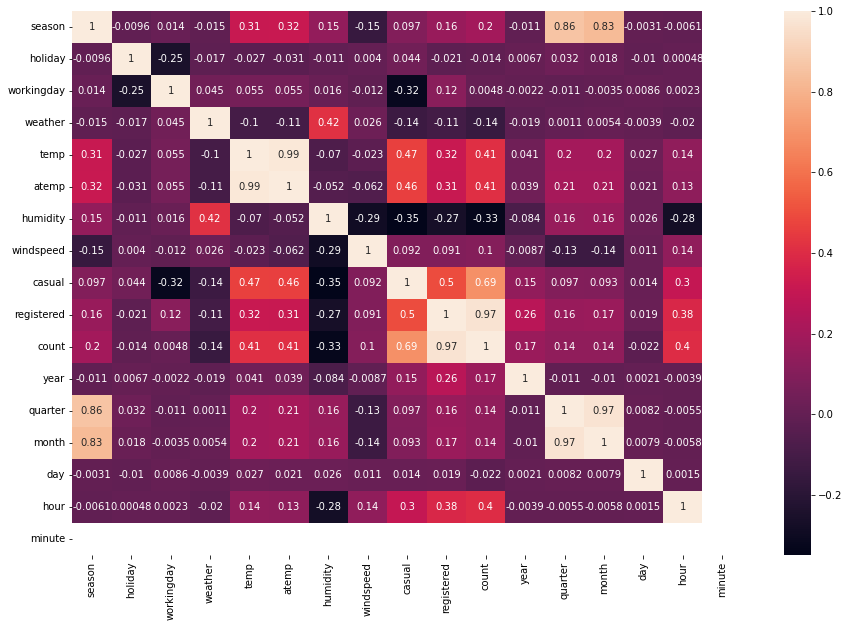

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True);

---
# Additional Analysis

## MEAN PER DAY
This model takes the average temp, humidity, windspeed and count of bike users per day, visualized per season.
Amongst the three variables, the results show that the movement of 'count of bike users' is explained by the movement in 'temp' (r2 = 41%)

### x = temp y = count

In [23]:
# pivot table
df_subsettemp = df.pivot_table(
    # columns = ,
    index = ['year','month', 'day', 'season'],
    values = ['temp', 'count'],
    aggfunc = 'mean').reset_index()
df_subsettemp

# left merge season
df_subsettemp = pd.merge(left = df_subsettemp, right = pd.DataFrame({'season': [1,2,3,4], 'seasons': ['spring', 'summer', 'fall', 'winter']}), how = 'left', on = 'season').drop(columns = 'season').round(0)
df_subsettemp

,year,month,day,count,temp,seasons
0,2011,1,1,41.0,14.0,spring
1,2011,1,2,35.0,15.0,spring
2,2011,1,3,61.0,8.0,spring
3,2011,1,4,68.0,8.0,spring
4,2011,1,5,70.0,9.0,spring
...,...,...,...,...,...,...
726,2012,12,27,44.0,10.0,spring
727,2012,12,28,52.0,10.0,spring
728,2012,12,29,34.0,10.0,spring
729,2012,12,30,40.0,10.0,spring


In [24]:
modeltemp = sm.ols(formula='temp ~ count', data=df_subsettemp).fit()  # instantiate and fit the model

In [25]:
modeltemp.rsquared_adj

0.4171405139220794

In [26]:
modeltemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     523.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           9.77e-88
Time:                        12:20:54   Log-Likelihood:                -2314.9
No. Observations:                 731   AIC:                             4634.
Df Residuals:                     729   BIC:                             4643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5146      0.558     15.262      0.000       7.419       9.610
count          0.0628      0.003     22.879      0.000       0.057       0.068
==============================================================================
Omnibus:                       62.660   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.054
Skew:                           0.219   Prob(JB):                     3.63e-06
Kurtosis:                       2.205   Cond. No.                         533.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### x = humidity y = count

In [27]:
# pivot table
df_subsethum = df.pivot_table(
    # columns = ,
    index = ['year','month', 'day', 'season'],
    values = ['humidity', 'count'],
    aggfunc = 'mean').reset_index()
df_subsethum

# left merge season
df_subsethum = pd.merge(left = df_subsethum, right = pd.DataFrame({'season': [1,2,3,4], 'seasons': ['spring', 'summer', 'fall', 'winter']}), how = 'left', on = 'season').drop(columns = 'season').round(0)
df_subsethum

,year,month,day,count,humidity,seasons
0,2011,1,1,41.0,81.0,spring
1,2011,1,2,35.0,70.0,spring
2,2011,1,3,61.0,44.0,spring
3,2011,1,4,68.0,59.0,spring
4,2011,1,5,70.0,44.0,spring
...,...,...,...,...,...,...
726,2012,12,27,44.0,65.0,spring
727,2012,12,28,52.0,59.0,spring
728,2012,12,29,34.0,75.0,spring
729,2012,12,30,40.0,48.0,spring


In [28]:
modelhum = sm.ols(formula='humidity ~ count', data=df_subsethum).fit()  # instantiate and fit the model

In [29]:
modelhum.rsquared_adj

0.008152665023948957

In [30]:
modelhum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.000
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00832
Time:                        12:20:54   Log-Likelihood:                -2976.0
No. Observations:                 731   AIC:                             5956.
Df Residuals:                     729   BIC:                             5965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.1634      1.378     48.005      0.000      63.458      68.869
count         -0.0180      0.007     -2.646      0.008      -0.031      -0.005
==============================================================================
Omnibus:                        4.558   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.491
Skew:                          -0.192   Prob(JB):                        0.106
Kurtosis:                       3.026   Cond. No.                         533.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### x = windspeed y = count

In [31]:
# pivot table
df_subsetwind = df.pivot_table(
    # columns = ,
    index = ['year','month', 'day', 'season'],
    values = ['windspeed', 'count'],
    aggfunc = 'mean').reset_index()
df_subsetwind

# left merge season
df_subsetwind = pd.merge(left = df_subsetwind, right = pd.DataFrame({'season': [1,2,3,4], 'seasons': ['spring', 'summer', 'fall', 'winter']}), how = 'left', on = 'season').drop(columns = 'season').round(0)
df_subsetwind

,year,month,day,count,windspeed,seasons
0,2011,1,1,41.0,11.0,spring
1,2011,1,2,35.0,17.0,spring
2,2011,1,3,61.0,17.0,spring
3,2011,1,4,68.0,11.0,spring
4,2011,1,5,70.0,13.0,spring
...,...,...,...,...,...,...
726,2012,12,27,44.0,23.0,spring
727,2012,12,28,52.0,10.0,spring
728,2012,12,29,34.0,8.0,spring
729,2012,12,30,40.0,24.0,spring


In [32]:
modelwind = sm.ols(formula='windspeed ~ count', data=df_subsetwind).fit()  # instantiate and fit the model

In [33]:
modelwind.rsquared_adj

0.04602223466382238

In [34]:
modelwind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              windspeed   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     36.22
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.79e-09
Time:                        12:20:55   Log-Likelihood:                -2222.9
No. Observations:                 731   AIC:                             4450.
Df Residuals:                     729   BIC:                             4459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5043      0.492     31.518      0.000      14.539      16.470
count         -0.0146      0.002     -6.018      0.000      -0.019      -0.010
==============================================================================
Omnibus:                       41.040   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.546
Skew:                           0.591   Prob(JB):                     7.81e-11
Kurtosis:                       3.361   Cond. No.                         533.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

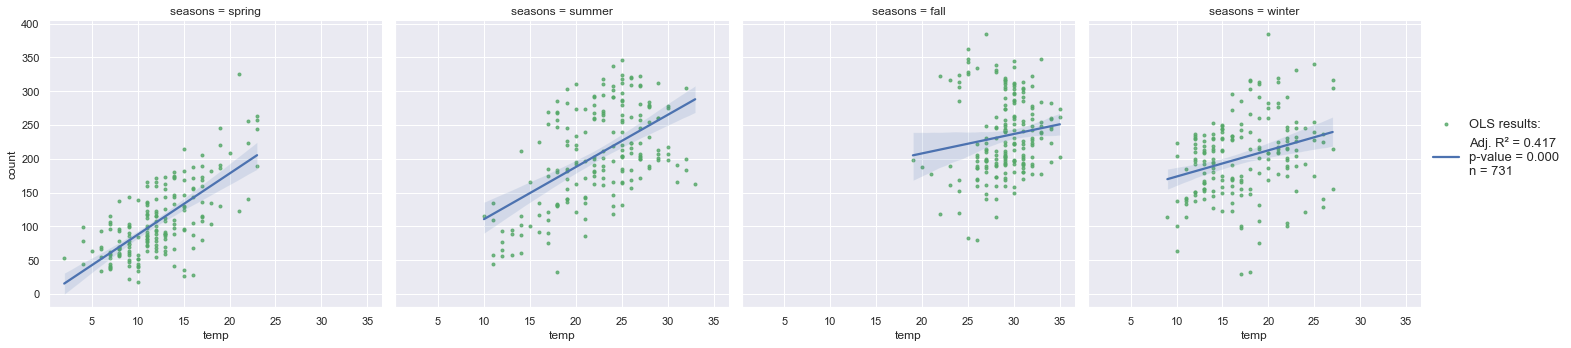

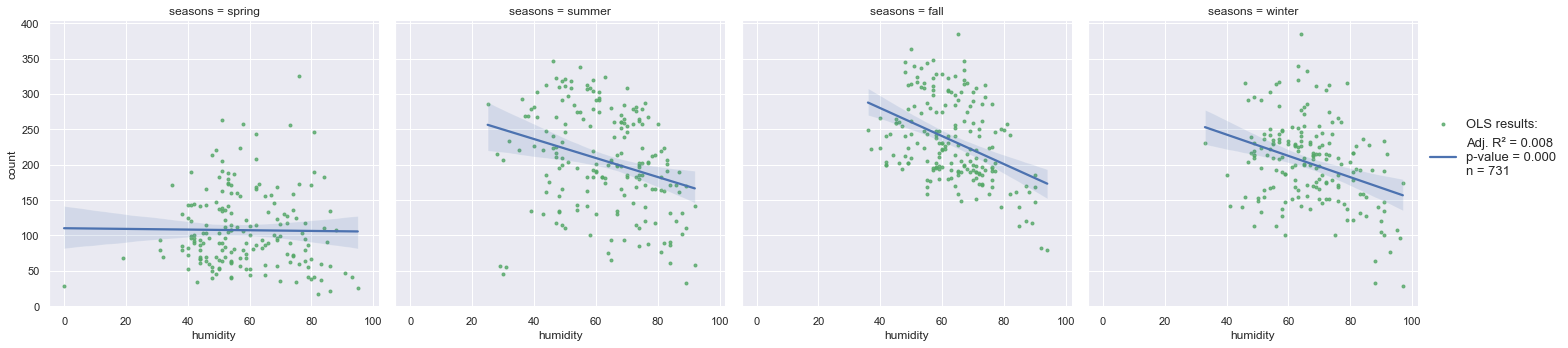

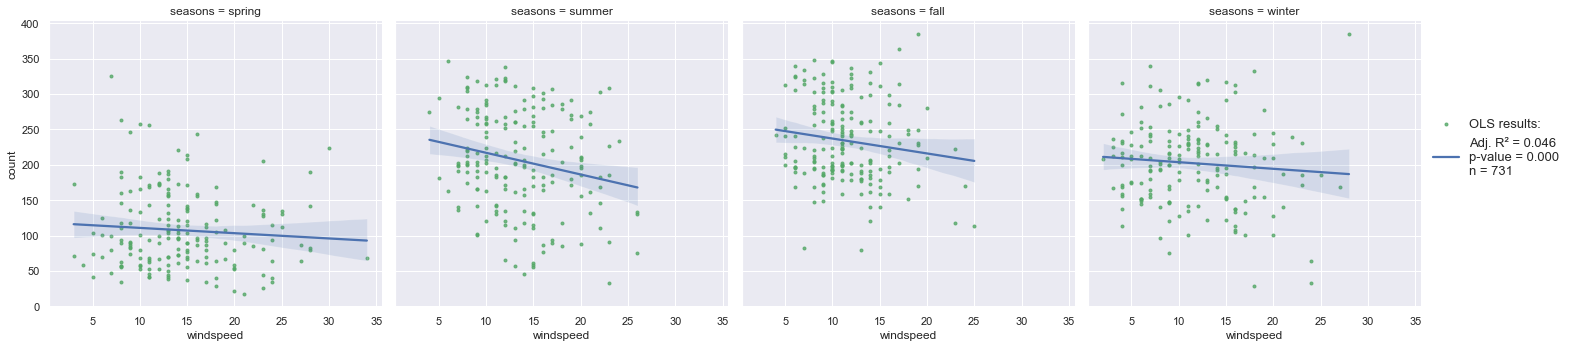

In [35]:
sns.set_theme(style = 'darkgrid')

ax1 = sns.lmplot(x = 'temp', y = 'count', 
               col = 'seasons', 
               data=df_subsettemp,
               markers=".",
               scatter_kws=dict(color='g')
              )
plt.legend(loc='best', labels=['OLS results:',f'Adj. R\u00b2 = {round(modeltemp.rsquared_adj,3)}\np-value = 0.000\nn = 731'], frameon = False, fontsize = 13, bbox_to_anchor = (1, 0.7))



ax2 = sns.lmplot(x = 'humidity', y = 'count', 
               col = 'seasons', 
               data=df_subsethum,
               markers=".",
               scatter_kws=dict(color='g'),
              )
plt.legend(loc='best', labels=['OLS results:',f'Adj. R\u00b2 = {round(modelhum.rsquared_adj,3)}\np-value = 0.000\nn = 731'], frameon = False, fontsize = 13, bbox_to_anchor = (1, 0.7))



ax3 = sns.lmplot(x = 'windspeed', y = 'count', 
               col = 'seasons', 
               data=df_subsetwind,
               markers=".",
               scatter_kws=dict(color='g'),
              )
plt.legend(loc='best', labels=['OLS results:',f'Adj. R\u00b2 = {round(modelwind.rsquared_adj,3)}\np-value = 0.000\nn = 731'], frameon = False, fontsize = 13, bbox_to_anchor = (1, 0.7));